In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

from math import pi

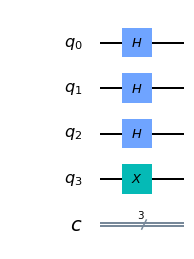

In [3]:
n = 4
c = n-1

qc = QuantumCircuit(n, c)
qc.x(n-1)

for x in range(n-1):
    qc.h(x)
    
qc.draw('mpl')

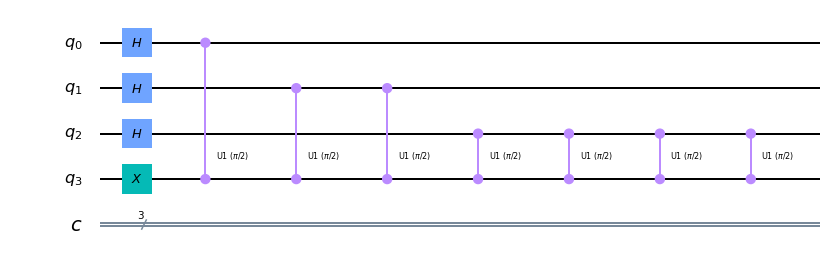

In [4]:
repetitions = 1
n -= 1
angle = pi/2
for qubit in range(n):
    for x in range(repetitions):
        qc.cu1(angle, qubit, n)
    repetitions *= 2

qc.draw('mpl')

In [5]:
def inverse_qft(circuit, n):
    for qubit in range(n//2):
        circuit.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            circuit.cu1(-pi/float(2**(j-m)), m, j)
        circuit.h(j)

In [ ]:
qc.barrier()
inverse_qft(qc, n)

In [ ]:
qc.draw('mpl')

In [ ]:
qc.barrier()
for m in range(n):
    qc.measure(m,m)

In [ ]:
qc.draw()

In [ ]:
backend = Aer.get_backend('qasm_simulator')
shots = 2048
results = execute(qc, backend=backend, shots=shots).result()
answer = results.get_counts()

plot_histogram(answer, (20,20))

In [ ]:

result = (int('011', 2)) / (2**n)
print("Result is %.3f" % result)